In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.core.dtypes.common import is_numeric_dtype
from fim import apriori, fpgrowth

In [2]:
df = pd.read_csv('dataset/preprocessed_dataset.csv')
df = df.drop(['intensity', 'sc_min', 'stft_min'], axis=1)
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,length_ms,frame_count,zero_crossings_sum,mfcc_mean,...,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_kur,mean,std,kur,skew
0,1,3,0,0,1,0,3737,179379.0,1.121235,-1.057124,...,13541.959028,0.674807,-0.276204,-0.734044,0.175085,-1.215025,3.844916e-07,0.014482,9.406061,0.706488
1,1,0,0,0,0,0,3904,187387.0,0.278471,-0.164264,...,12000.290443,0.264372,-0.365037,-0.706940,0.883757,-1.384174,-7.149491e-08,0.020417,19.564187,0.748262
2,0,4,1,0,1,0,4671,224224.0,1.592681,-0.395188,...,12007.751173,0.665423,0.250018,-1.163996,0.879099,-1.242947,2.429985e-06,0.024317,4.881241,0.771346
3,1,7,0,1,0,0,3637,174575.0,-0.346031,-1.633922,...,12048.223893,0.297811,-0.707183,-0.830636,1.227493,-1.445318,2.373929e-07,0.003561,13.040259,-0.072032
4,0,4,1,0,1,0,4404,211411.0,0.614322,-0.590964,...,12025.582707,0.628032,0.418192,-0.725278,0.811169,-1.366742,8.454691e-07,0.027522,7.485109,1.018009


In [3]:
vc_dict = {0: 'song', 1: 'speech'}
df['vocal_channel'] = df['vocal_channel'].map(vc_dict)

emotion_dict = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
df['emotion'] = df['emotion'].map(emotion_dict)

emint_dict = {0: 'normal', 1: 'strong'}
df['emotional_intensity'] = df['emotional_intensity'].map(emint_dict)

statement_dict = {0: 'Dogs are sitting by the door', 1: 'Kids are talking by the door'}
df['statement'] = df['statement'].map(statement_dict)

sex_dict = {0: 'F', 1: 'M'}
df['sex'] = df['sex'].map(sex_dict)

repetition_dict = {0: '1st', 1: '2nd'}
df['repetition'] = df['repetition'].map(repetition_dict)

In [4]:
for column in df.columns:
    if is_numeric_dtype(df[column]):
        df[column] = pd.qcut(df[column], 4, duplicates='drop')
        df[column] = df[column].astype(str) + '_' + column

df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,length_ms,frame_count,zero_crossings_sum,mfcc_mean,...,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_kur,mean,std,kur,skew
0,speech,fearful,normal,Dogs are sitting by the door,2nd,F,"(3604.0, 4004.0]_length_ms","(172972.0, 190591.0]_frame_count","(0.568, 4.711]_zero_crossings_sum","(-2.992, -0.684]_mfcc_mean",...,"(12091.673, 16503.122]_sc_max","(0.485, 0.81]_sc_kur","(-0.71, -0.00666]_sc_skew","(-2.7479999999999998, -0.725]_stft_mean","(0.122, 0.752]_stft_std","(-1.293, -1.155]_stft_kur","(-9.8e-08, 8.36e-07]_mean","(0.0139, 0.0262]_std","(6.53, 9.834]_kur","(0.688, 4.062]_skew"
1,speech,angry,normal,Dogs are sitting by the door,1st,F,"(3604.0, 4004.0]_length_ms","(172972.0, 190591.0]_frame_count","(-0.135, 0.568]_zero_crossings_sum","(-0.684, 0.0312]_mfcc_mean",...,"(11521.887, 12000.372]_sc_max","(-0.001, 0.298]_sc_kur","(-0.71, -0.00666]_sc_skew","(-0.725, -0.000548]_stft_mean","(0.752, 2.547]_stft_std","(-1.391, -1.293]_stft_kur","(-9.8e-08, 8.36e-07]_mean","(0.0139, 0.0262]_std","(14.055, 53.501]_kur","(0.688, 4.062]_skew"
2,song,happy,strong,Dogs are sitting by the door,2nd,F,"(4538.0, 6373.0]_length_ms","(217817.0, 305906.0]_frame_count","(0.568, 4.711]_zero_crossings_sum","(-0.684, 0.0312]_mfcc_mean",...,"(12000.372, 12091.673]_sc_max","(0.485, 0.81]_sc_kur","(-0.00666, 0.587]_sc_skew","(-2.7479999999999998, -0.725]_stft_mean","(0.752, 2.547]_stft_std","(-1.293, -1.155]_stft_kur","(8.36e-07, 0.00122]_mean","(0.0139, 0.0262]_std","(2.507, 6.53]_kur","(0.688, 4.062]_skew"
3,speech,surprised,normal,Kids are talking by the door,1st,F,"(3604.0, 4004.0]_length_ms","(172972.0, 190591.0]_frame_count","(-0.684, -0.135]_zero_crossings_sum","(-2.992, -0.684]_mfcc_mean",...,"(12000.372, 12091.673]_sc_max","(-0.001, 0.298]_sc_kur","(-0.71, -0.00666]_sc_skew","(-2.7479999999999998, -0.725]_stft_mean","(0.752, 2.547]_stft_std","(-1.6709999999999998, -1.391]_stft_kur","(-9.8e-08, 8.36e-07]_mean","(-0.00019900000000000007, 0.00681]_std","(9.834, 14.055]_kur","(-0.625, 0.12]_skew"
4,song,happy,strong,Dogs are sitting by the door,2nd,F,"(4004.0, 4538.0]_length_ms","(190591.0, 217817.0]_frame_count","(0.568, 4.711]_zero_crossings_sum","(-0.684, 0.0312]_mfcc_mean",...,"(12000.372, 12091.673]_sc_max","(0.485, 0.81]_sc_kur","(-0.00666, 0.587]_sc_skew","(-2.7479999999999998, -0.725]_stft_mean","(0.752, 2.547]_stft_std","(-1.391, -1.293]_stft_kur","(8.36e-07, 0.00122]_mean","(0.0262, 0.152]_std","(6.53, 9.834]_kur","(0.688, 4.062]_skew"


# Apriori

In [5]:
support = 20  # 20%
zmin = 2  # minimum number of items per item set
X = df.values.tolist()

In [6]:
itemsets = apriori(X, target='s', supp=support, zmin=zmin, report='S')
itemsets_df = pd.DataFrame(itemsets, columns=['frequent_itemset', 'support'])
itemsets_df

,frequent_itemset,support
0,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",23.626601
1,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",22.387443
2,"((4538.0, 6373.0]_length_ms, song)",22.717885
3,"((3604.0, 4004.0]_length_ms, (172972.0, 190591...",22.924411
4,"((3604.0, 4004.0]_length_ms, (172972.0, 190591...",22.015696
...,...,...
68,"(Dogs are sitting by the door, normal)",27.054936
69,"(Dogs are sitting by the door, speech)",29.863693
70,"(M, normal)",27.426683
71,"(M, speech)",29.533251


In [7]:
itemsets = apriori(X, target='c', supp=support, zmin=zmin, report='S')
pd.DataFrame(itemsets, columns=['closed_itemset', 'support'])

,closed_itemset,support
0,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",23.626601
1,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",22.387443
2,"((4538.0, 6373.0]_length_ms, song)",22.717885
3,"((3604.0, 4004.0]_length_ms, (172972.0, 190591...",22.924411
4,"((3604.0, 4004.0]_length_ms, (172972.0, 190591...",22.015696
...,...,...
68,"(Dogs are sitting by the door, normal)",27.054936
69,"(Dogs are sitting by the door, speech)",29.863693
70,"(M, normal)",27.426683
71,"(M, speech)",29.533251


In [8]:
itemsets = apriori(X, target='m', supp=support, zmin=zmin, report='S')
pd.DataFrame(itemsets, columns=['maximal_itemset', 'support'])

,maximal_itemset,support
0,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",22.387443
1,"((3604.0, 4004.0]_length_ms, (172972.0, 190591...",22.015696
2,"((190591.0, 217817.0]_frame_count, (4004.0, 45...",23.626601
3,"((0.709, 2.629]_mfcc_std, (-0.0001990000000000...",22.593969
4,"((0.709, 2.629]_mfcc_std, speech)",21.437423
5,"((0.721, 2.962]_mfcc_mean, M)",20.570012
6,"((14.055, 53.501]_kur, speech)",23.172243
7,"((0.752, 2.547]_stft_std, F)",22.015696
8,"((0.0262, 0.152]_std, (-2.6, -0.696]_mfcc_std)",22.511359
9,"((0.0262, 0.152]_std, strong)",20.198265


In [9]:
support = 10

In [10]:
itemsets = apriori(X, target='s', supp=support, zmin=zmin, report='S')
pd.DataFrame(itemsets, columns=['frequent_itemset', 'support'])

,frequent_itemset,support
0,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",23.626601
1,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",12.845931
2,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",12.598100
3,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",11.276332
4,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",11.152416
...,...,...
1487,"(Dogs are sitting by the door, speech)",29.863693
1488,"(M, normal)",27.426683
1489,"(M, normal, speech)",15.778604
1490,"(M, speech)",29.533251


In [11]:
itemsets = apriori(X, target='c', supp=support, zmin=zmin, report='S')
pd.DataFrame(itemsets, columns=['closed_itemset', 'support'])

,closed_itemset,support
0,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",23.626601
1,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",12.845931
2,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",12.598100
3,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",11.276332
4,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",11.152416
...,...,...
1446,"(Dogs are sitting by the door, speech)",29.863693
1447,"(M, normal)",27.426683
1448,"(M, normal, speech)",15.778604
1449,"(M, speech)",29.533251


In [12]:
itemsets = apriori(X, target='m', supp=support, zmin=zmin, report='S')
pd.DataFrame(itemsets, columns=['maximal_itemset', 'support'])

,maximal_itemset,support
0,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",12.598100
1,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",11.152416
2,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",14.745973
3,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",10.367617
4,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",10.987195
...,...,...
719,"(1st, Dogs are sitting by the door, speech)",15.117720
720,"(1st, M, normal)",13.754647
721,"(1st, normal, speech)",15.778604
722,"(Dogs are sitting by the door, M, normal)",13.795952


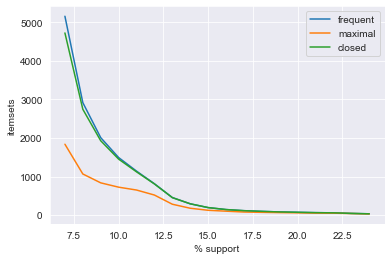

In [13]:
len_freq_it = []
len_max_it = []
len_cl_it = []
max_supp = 25
for i in range(7, max_supp):
    frequent_itemsets = apriori(X, target='s', supp=i, zmin=zmin)
    maximal_itemsets = apriori(X, target='m', supp=i, zmin=zmin)
    closed_itemsets = apriori(X, target='c', supp=i, zmin=zmin)
    len_freq_it.append(len(frequent_itemsets))
    len_max_it.append(len(maximal_itemsets))
    len_cl_it.append(len(closed_itemsets))

plt.plot(np.arange(7, max_supp), len_freq_it, label='frequent')
plt.plot(np.arange(7, max_supp), len_max_it, label='maximal')
plt.plot(np.arange(7, max_supp), len_cl_it, label='closed')
plt.xlabel('% support')
plt.ylabel('itemsets')
plt.legend()
plt.show()

# Rules

In [14]:
conf = 70
support = 20
zmin = 2
rules = apriori(X, target='r', supp=support, zmin=zmin, conf=conf, report='aScl')
rules_df = pd.DataFrame(
    rules,
    columns=[
        'consequent',
        'antecedent',
        'abs_support',
        '%_support',
        'confidence',
        'lift',
    ],
)
rules_df.sort_values(by='lift', axis=0, ascending=False)

,consequent,antecedent,abs_support,%_support,confidence,lift
2,"(4538.0, 6373.0]_length_ms","((217817.0, 305906.0]_frame_count, song)",542,22.387443,0.959292,4.004217
3,"(217817.0, 305906.0]_frame_count","((4538.0, 6373.0]_length_ms,)",572,23.626601,0.986207,3.999342
4,"(4538.0, 6373.0]_length_ms","((217817.0, 305906.0]_frame_count,)",572,23.626601,0.958124,3.999342
1,"(217817.0, 305906.0]_frame_count","((4538.0, 6373.0]_length_ms, song)",542,22.387443,0.985455,3.996291
14,"(190591.0, 217817.0]_frame_count","((4004.0, 4538.0]_length_ms,)",572,23.626601,0.940789,3.770946
...,...,...,...,...,...,...
96,normal,"((-1.001, 172972.0]_frame_count, speech)",417,17.224287,0.702020,1.303367
31,speech,"((0.695, 2.505]_sc_std,)",457,18.876497,0.755372,1.278850
79,speech,"((-2.2279999999999998, -0.684]_zero_crossings_...",456,18.835192,0.752475,1.273946
50,speech,"((-0.71, -0.00666]_sc_skew,)",455,18.793887,0.752066,1.273253


In [15]:
conf = 50
support = 20
zmin = 2
rules = apriori(X, target='r', supp=support, zmin=zmin, conf=conf, report='aScl')
rules_df_tmp = pd.DataFrame(
    rules,
    columns=[
        'consequent',
        'antecedent',
        'abs_support',
        '%_support',
        'confidence',
        'lift',
    ],
)
rules_df_tmp.sort_values(by='lift', axis=0, ascending=False)

,consequent,antecedent,abs_support,%_support,confidence,lift
10,"(4538.0, 6373.0]_length_ms","((217817.0, 305906.0]_frame_count, song)",542,22.387443,0.959292,4.004217
16,"(4538.0, 6373.0]_length_ms","((217817.0, 305906.0]_frame_count,)",572,23.626601,0.958124,3.999342
15,"(217817.0, 305906.0]_frame_count","((4538.0, 6373.0]_length_ms,)",572,23.626601,0.986207,3.999342
9,"(217817.0, 305906.0]_frame_count","((4538.0, 6373.0]_length_ms, song)",542,22.387443,0.985455,3.996291
91,"(190591.0, 217817.0]_frame_count","((4004.0, 4538.0]_length_ms,)",572,23.626601,0.940789,3.770946
...,...,...,...,...,...,...
655,speech,"((-2.6, -0.696]_mfcc_std, strong)",266,10.987195,0.530938,0.898882
391,speech,"((0.568, 4.711]_zero_crossings_sum,)",319,13.176373,0.527273,0.892676
322,speech,"((0.721, 2.962]_mfcc_mean,)",313,12.928542,0.517355,0.875886
687,speech,"((-0.001944, -1.41e-06]_mean,)",313,12.928542,0.516502,0.874441


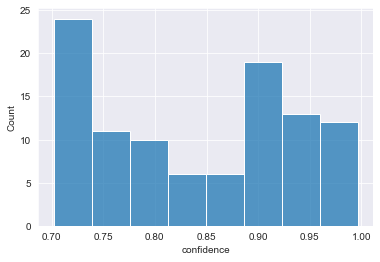

In [16]:
sns.histplot(data=rules_df, x='confidence')
plt.show()

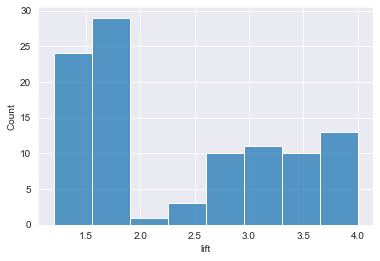

In [17]:
sns.histplot(data=rules_df, x='lift')
plt.show()

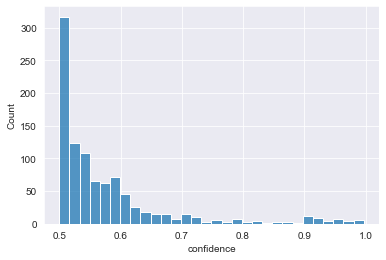

In [18]:
sns.histplot(data=rules_df_tmp, x='confidence')
plt.show()

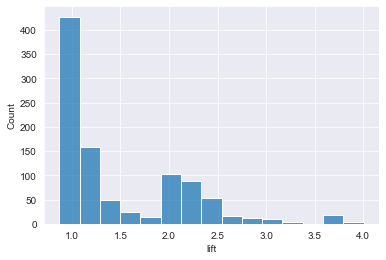

In [19]:
sns.histplot(data=rules_df_tmp, x='lift')
plt.show()

# Classification

In [20]:
rules_df[rules_df['consequent'] == 'speech']

,consequent,antecedent,abs_support,%_support,confidence,lift
6,speech,"((3604.0, 4004.0]_length_ms, (172972.0, 190591...",533,22.015696,0.960360,1.625897
11,speech,"((3604.0, 4004.0]_length_ms,)",568,23.461380,0.954622,1.616181
15,speech,"((14.055, 53.501]_kur,)",561,23.172243,0.927273,1.569879
20,speech,"((0.709, 2.629]_mfcc_std, (-0.0001990000000000...",478,19.743907,0.873857,1.479447
27,speech,"((0.709, 2.629]_mfcc_std,)",519,21.437423,0.857851,1.452348
29,speech,"((0.733, 3.115]_mfcc_max,)",468,19.330855,0.773554,1.309632
30,speech,"((9.834, 14.055]_kur,)",478,19.743907,0.790083,1.337615
31,speech,"((0.695, 2.505]_sc_std,)",457,18.876497,0.755372,1.278850
49,speech,"((0.692, 2.84]_sc_mean,)",593,24.494011,0.980165,1.659427
50,speech,"((-0.71, -0.00666]_sc_skew,)",455,18.793887,0.752066,1.273253


In [21]:
rules_df[rules_df['consequent'] == 'song']

,consequent,antecedent,abs_support,%_support,confidence,lift
0,song,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",542,22.387443,0.947552,2.314858
5,song,"((4538.0, 6373.0]_length_ms,)",550,22.717885,0.948276,2.316625
12,song,"((217817.0, 305906.0]_frame_count,)",565,23.337464,0.946399,2.312040
41,song,"((0.587, 3.961]_sc_skew,)",471,19.454771,0.778512,1.901896
73,song,"((-2.8409999999999997, -0.686]_sc_mean,)",441,18.215613,0.727723,1.777817
80,song,"((2.507, 6.53]_kur,)",547,22.593969,0.902640,2.205138
85,song,"((-2.806, -0.732]_mfcc_max, F)",385,15.902520,0.703839,1.719470


In [22]:
rules_df[rules_df['consequent'] == 'normal']

,consequent,antecedent,abs_support,%_support,confidence,lift
19,normal,"((0.709, 2.629]_mfcc_std, (-0.0001990000000000...",400,16.522098,0.731261,1.357656
25,normal,"((0.709, 2.629]_mfcc_std, speech)",387,15.985130,0.745665,1.384397
26,normal,"((0.709, 2.629]_mfcc_std,)",449,18.546055,0.742149,1.377870
75,normal,"((-0.00019900000000000007, 0.00681]_std, speech)",383,15.819909,0.728137,1.351855
76,normal,"((-0.00019900000000000007, 0.00681]_std,)",439,18.133003,0.724422,1.344959
81,normal,"((-2.992, -0.684]_mfcc_mean, F)",391,16.150351,0.714808,1.327109
83,normal,"((-2.992, -0.684]_mfcc_mean,)",436,18.009087,0.719472,1.335768
89,normal,"((-1.001, 172972.0]_frame_count, (2935.999, 36...",412,17.017761,0.707904,1.314291
90,normal,"((-1.001, 172972.0]_frame_count, (2935.999, 36...",413,17.059067,0.705983,1.310724
96,normal,"((-1.001, 172972.0]_frame_count, speech)",417,17.224287,0.702020,1.303367


In [23]:
rules_df[rules_df['consequent'] == 'strong']

,consequent,antecedent,abs_support,%_support,confidence,lift
33,strong,"((0.0262, 0.152]_std, (-2.6, -0.696]_mfcc_std)",453,18.711276,0.831193,1.801538
38,strong,"((0.0262, 0.152]_std,)",489,20.198265,0.808264,1.751843
74,strong,"((-2.6, -0.696]_mfcc_std,)",501,20.693928,0.826733,1.791871


# FP-Growth

In [24]:
support = 20
itemsets = fpgrowth(X, target="s", supp=support, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"(normal, speech)",31.557208
1,"(M, speech)",29.533251
2,"(M, normal)",27.426683
3,"(Dogs are sitting by the door, speech)",29.863693
4,"(Dogs are sitting by the door, normal)",27.054936
...,...,...
68,"((3604.0, 4004.0]_length_ms, (172972.0, 190591...",22.015696
69,"((3604.0, 4004.0]_length_ms, (172972.0, 190591...",22.924411
70,"((4538.0, 6373.0]_length_ms, song)",22.717885
71,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",22.387443


In [25]:
conf = 70
rules = fpgrowth(X, target='r', supp=support, zmin=zmin, conf=conf, report='aScl')
rules_df = pd.DataFrame(
    rules,
    columns=[
        'consequent',
        'antecedent',
        'abs_support',
        '%_support',
        'confidence',
        'lift',
    ],
)

In [26]:
rules_df[rules_df['consequent'] == 'speech']

,consequent,antecedent,abs_support,%_support,confidence,lift
0,speech,"((2935.999, 3604.0]_length_ms,)",634,26.187526,0.993730,1.682393
3,speech,"((-1.001, 172972.0]_frame_count,)",594,24.535316,0.970588,1.643213
5,speech,"((-1.001, 172972.0]_frame_count, (2935.999, 36...",582,24.039653,0.994872,1.684325
12,speech,"((172972.0, 190591.0]_frame_count,)",585,24.163569,0.962171,1.628962
13,speech,"((-2.2279999999999998, -0.684]_zero_crossings_...",456,18.835192,0.752475,1.273946
16,speech,"((-0.00019900000000000007, 0.00681]_std,)",526,21.726559,0.867987,1.469508
20,speech,"((-3.807, -0.56]_stft_std,)",558,23.048327,0.920792,1.558907
21,speech,"((-3.807, -0.56]_stft_std, M)",509,21.024370,0.915468,1.549893
28,speech,"((-2.4339999999999997, -0.71]_sc_skew,)",604,24.948368,0.996700,1.687420
29,speech,"((-0.001, 0.298]_sc_kur,)",480,19.826518,0.792079,1.340996


In [27]:
rules_df[rules_df['consequent'] == 'song']

,consequent,antecedent,abs_support,%_support,confidence,lift
15,song,"((2.507, 6.53]_kur,)",547,22.593969,0.902640,2.205138
27,song,"((-2.8409999999999997, -0.686]_sc_mean,)",441,18.215613,0.727723,1.777817
35,song,"((-2.806, -0.732]_mfcc_max, F)",385,15.902520,0.703839,1.719470
65,song,"((0.587, 3.961]_sc_skew,)",471,19.454771,0.778512,1.901896
88,song,"((217817.0, 305906.0]_frame_count,)",565,23.337464,0.946399,2.312040
95,song,"((4538.0, 6373.0]_length_ms,)",550,22.717885,0.948276,2.316625
96,song,"((4538.0, 6373.0]_length_ms, (217817.0, 305906...",542,22.387443,0.947552,2.314858


In [28]:
rules_df[rules_df['consequent'] == 'normal']

,consequent,antecedent,abs_support,%_support,confidence,lift
1,normal,"((2935.999, 3604.0]_length_ms, speech)",447,18.463445,0.705047,1.308987
2,normal,"((2935.999, 3604.0]_length_ms,)",448,18.504750,0.702194,1.303691
4,normal,"((-1.001, 172972.0]_frame_count, speech)",417,17.224287,0.702020,1.303367
8,normal,"((-1.001, 172972.0]_frame_count, (2935.999, 36...",412,17.017761,0.707904,1.314291
9,normal,"((-1.001, 172972.0]_frame_count, (2935.999, 36...",413,17.059067,0.705983,1.310724
17,normal,"((-0.00019900000000000007, 0.00681]_std, speech)",383,15.819909,0.728137,1.351855
18,normal,"((-0.00019900000000000007, 0.00681]_std,)",439,18.133003,0.724422,1.344959
31,normal,"((-2.992, -0.684]_mfcc_mean,)",436,18.009087,0.719472,1.335768
32,normal,"((-2.992, -0.684]_mfcc_mean, F)",391,16.150351,0.714808,1.327109
76,normal,"((0.709, 2.629]_mfcc_std, speech)",387,15.985130,0.745665,1.384397


In [29]:
rules_df[rules_df['consequent'] == 'strong']

,consequent,antecedent,abs_support,%_support,confidence,lift
19,strong,"((-2.6, -0.696]_mfcc_std,)",501,20.693928,0.826733,1.791871
36,strong,"((0.0262, 0.152]_std,)",489,20.198265,0.808264,1.751843
37,strong,"((0.0262, 0.152]_std, (-2.6, -0.696]_mfcc_std)",453,18.711276,0.831193,1.801538
